# Network Analysis — Workbook

In this series of lessons, we're going to learn about network analysis. Network analysis will help us better understand the complex relationships between groups of people, fictional characters, and other kinds of things.

*Note: You can explore this [workbook](https://mybinder.org/v2/gh/INFO1350/Intro-CA-SP21/master?urlpath=lab/tree/book/06-Network-Analysis/01.5-Network-Analysis-WORKBOOK.ipynb) in the cloud via Binder.*

## Install NetworkX

In [ ]:
!pip install networkx

## Import Libraries

In [1]:
import networkx

import pandas as pd
pd.options.display.max_rows = 400
import matplotlib.pyplot as plt

## *Game of Thrones* Network

The network data that we're going to use in this lesson is taken from Andrew Beveridge and Jie Shan's paper, ["Network of Thrones."](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within 15 words of another character in *A Storm of Swords*, the third book in the series.

| Network Element      | GOT |         
| :-------------: |:-------------:| 
| Node    | GOT character | 
| Edge     | Mutually mentioned within 15 words      | 
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between Jon Snow and Sam Tarly:

> "**Arya** gave **Gendry** a sideways look. *He said it with me, like **Jon** used to do, back in Winterfell.* She missed **Jon Snow** the most of all her brothers.""

In [17]:
got_df = pd.read_csv('practice.txt', encoding='utf-8')

In [18]:
got_df

,Source,Target,Weight
0,Jon,Ygritte,1
1,Jon,Samwell,1
2,Jon,Gendry,2
3,Jon,Arya,2
4,Arya,Gendry,1
5,Ygritte,Free Folk 1,1


## Create a Network From a Pandas DataFrame

In [20]:
G = networkx.from_pandas_edgelist(got_df,
                                  source='Source',
                                  target='Target',
                                  edge_attr='Weight')

## Draw a Simple Network

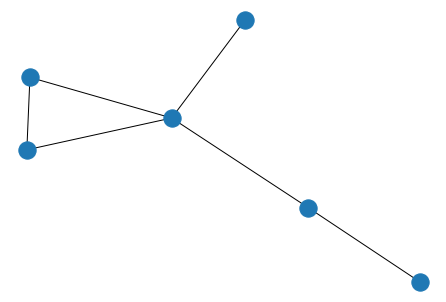

In [21]:
networkx.draw(G)

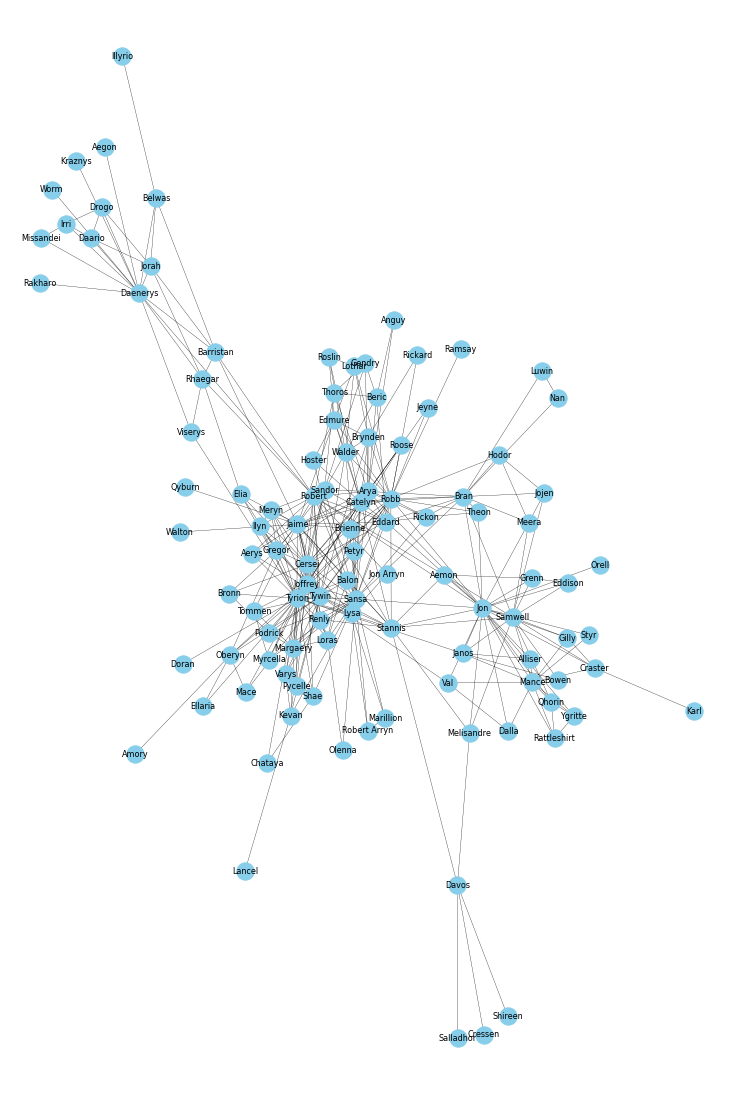

In [6]:
plt.figure(figsize=(10,15))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [7]:
networkx.degree(G)

DegreeView({'Aemon': 5, 'Grenn': 4, 'Samwell': 15, 'Aerys': 4, 'Jaime': 24, 'Robert': 18, 'Tyrion': 36, 'Tywin': 22, 'Alliser': 3, 'Mance': 12, 'Amory': 1, 'Oberyn': 7, 'Arya': 19, 'Anguy': 2, 'Beric': 6, 'Bran': 14, 'Brynden': 8, 'Cersei': 20, 'Gendry': 4, 'Gregor': 12, 'Joffrey': 18, 'Jon': 26, 'Rickon': 6, 'Roose': 4, 'Sandor': 13, 'Thoros': 5, 'Balon': 6, 'Loras': 9, 'Belwas': 4, 'Barristan': 6, 'Illyrio': 1, 'Hodor': 4, 'Jojen': 4, 'Luwin': 2, 'Meera': 5, 'Nan': 2, 'Theon': 4, 'Brienne': 7, 'Bronn': 4, 'Podrick': 5, 'Lothar': 5, 'Walder': 8, 'Catelyn': 18, 'Edmure': 8, 'Hoster': 3, 'Jeyne': 2, 'Lysa': 10, 'Petyr': 7, 'Robb': 25, 'Roslin': 4, 'Sansa': 26, 'Stannis': 14, 'Elia': 5, 'Ilyn': 6, 'Meryn': 7, 'Pycelle': 4, 'Shae': 5, 'Varys': 7, 'Craster': 5, 'Karl': 1, 'Daario': 4, 'Drogo': 4, 'Irri': 4, 'Daenerys': 14, 'Aegon': 1, 'Jorah': 6, 'Kraznys': 1, 'Missandei': 2, 'Rakharo': 1, 'Rhaegar': 6, 'Viserys': 3, 'Worm': 1, 'Davos': 5, 'Cressen': 1, 'Salladhor': 1, 'Eddard': 12, 'Eddis

Make the degree values a dictionary, then add it as a network "attribute"

In [8]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [9]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df

,node,degree
0,Aemon,5
1,Grenn,4
2,Samwell,15
3,Aerys,4
4,Jaime,24
5,Robert,18
6,Tyrion,36
7,Tywin,22
8,Alliser,3
9,Mance,12


**Your turn!** Sort the DataFrame from highest degree centrality to lowest degree centrality. Then re-assign this sorted DataFrame to the variable `degree_df`.

In [ ]:
degree_df ... #Your code here


Plot the nodes with the highest degree values

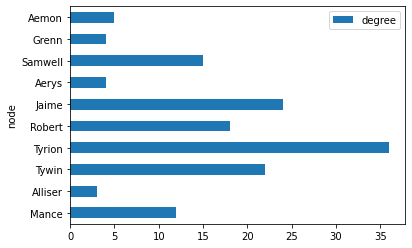

In [10]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [22]:
networkx.degree(G)

DegreeView({'Jon': 4, 'Ygritte': 2, 'Samwell': 1, 'Gendry': 2, 'Arya': 2, ' Free Folk 1': 1})

In [23]:
networkx.betweenness_centrality(G, normalized=False)

{'Jon': 8.0,
 'Ygritte': 4.0,
 'Samwell': 0.0,
 'Gendry': 0.0,
 'Arya': 0.0,
 ' Free Folk 1': 0.0}

In [12]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [13]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [14]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df

,node,betweenness
0,Aemon,0.004623
1,Grenn,0.000060
2,Samwell,0.032273
3,Aerys,0.000000
4,Jaime,0.099943
5,Robert,0.209452
6,Tyrion,0.197913
7,Tywin,0.065538
8,Alliser,0.000000
9,Mance,0.007276


**Your turn!** Sort the DataFrame from highest betweenness centrality to lowest betweenness centrality. Then re-assign this sorted DataFrame to the variable `betweenness_df`.

In [ ]:
betweenness_df = ... #Your code here


Plot the nodes with the highest betweenness centrality scores

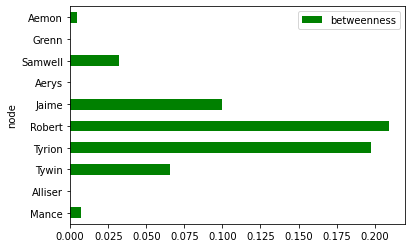

In [15]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Discussion

- Which characters have the highest degree centrality scores?
- Which characters have the highest betweenness centrality scores?
- Why do these metrics differ? What can betweenness centrality tell us about the roles that the characters play in the GOT universe?


## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [16]:
networkx.degree(G, weight='Weight')

DegreeView({'Aemon': 74, 'Grenn': 81, 'Samwell': 282, 'Aerys': 37, 'Jaime': 372, 'Robert': 128, 'Tyrion': 551, 'Tywin': 204, 'Alliser': 29, 'Mance': 160, 'Amory': 5, 'Oberyn': 76, 'Arya': 269, 'Anguy': 15, 'Beric': 75, 'Bran': 344, 'Brynden': 55, 'Cersei': 226, 'Gendry': 59, 'Gregor': 117, 'Joffrey': 255, 'Jon': 442, 'Rickon': 81, 'Roose': 17, 'Sandor': 137, 'Thoros': 60, 'Balon': 29, 'Loras': 76, 'Belwas': 67, 'Barristan': 63, 'Illyrio': 10, 'Hodor': 177, 'Jojen': 125, 'Luwin': 8, 'Meera': 139, 'Nan': 18, 'Theon': 38, 'Brienne': 122, 'Bronn': 59, 'Podrick': 64, 'Lothar': 34, 'Walder': 87, 'Catelyn': 184, 'Edmure': 98, 'Hoster': 24, 'Jeyne': 28, 'Lysa': 108, 'Petyr': 89, 'Robb': 342, 'Roslin': 32, 'Sansa': 383, 'Stannis': 146, 'Elia': 29, 'Ilyn': 32, 'Meryn': 47, 'Pycelle': 24, 'Shae': 45, 'Varys': 49, 'Craster': 75, 'Karl': 6, 'Daario': 30, 'Drogo': 35, 'Irri': 33, 'Daenerys': 232, 'Aegon': 8, 'Jorah': 89, 'Kraznys': 10, 'Missandei': 30, 'Rakharo': 7, 'Rhaegar': 42, 'Viserys': 19, 'Wo

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [17]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [18]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
6,Tyrion,551
21,Jon,442
50,Sansa,383
4,Jaime,372
15,Bran,344
48,Robb,342
2,Samwell,282
12,Arya,269
20,Joffrey,255
63,Daenerys,232


Plot the nodes with the highest weighted degree values

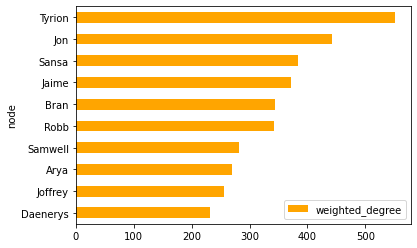

In [19]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [20]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [21]:
communities = community.greedy_modularity_communities(G)

In [22]:
communities

[frozenset({'Aerys',
            'Amory',
            'Balon',
            'Bronn',
            'Chataya',
            'Doran',
            'Elia',
            'Ellaria',
            'Gregor',
            'Ilyn',
            'Jaime',
            'Joffrey',
            'Kevan',
            'Lancel',
            'Loras',
            'Mace',
            'Margaery',
            'Meryn',
            'Myrcella',
            'Oberyn',
            'Olenna',
            'Podrick',
            'Pycelle',
            'Qyburn',
            'Renly',
            'Sandor',
            'Shae',
            'Tommen',
            'Tyrion',
            'Tywin',
            'Varys',
            'Walton'}),
 frozenset({'Aemon',
            'Alliser',
            'Bowen',
            'Craster',
            'Cressen',
            'Dalla',
            'Davos',
            'Eddison',
            'Gilly',
            'Grenn',
            'Hodor',
            'Janos',
            'Jojen',
            'Jon',
     

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [23]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [24]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [25]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [26]:
communities_df

,node,modularity_class
25,Thoros,4
18,Gendry,4
14,Beric,4
13,Anguy,4
28,Belwas,3
94,Jon Arryn,3
65,Jorah,3
67,Missandei,3
71,Worm,3
70,Viserys,3


Inspect nodes in the DataFrame with the modularity class 2

In [27]:
communities_df[communities_df['modularity_class'] ... # Your code here]

SyntaxError: invalid syntax (<ipython-input-27-3b258940a5da>, line 1)

## Visualization with nx_altair

Install nx_altair for visualization

In [ ]:
!pip install nx_altair

Import nx_altair and altair

In [28]:
import nx_altair as nxa
import altair as alt

Add node name as an attribute

In [29]:
for node in G.nodes():
    G.nodes[node]['name'] = node

Create a network layout

In [30]:
pos = networkx.spring_layout(G)

Draw the graph with nx_altair

In [31]:
viz = nxa.draw_networkx(
    G,
    pos=pos,
    node_color= 'modularity_class',
    cmap='viridis',
    width=1,
    edge_color='black',
    node_tooltip = ['name', 'modularity_class']
)
alt.vconcat(viz)

alt.VConcatChart(...)

## Visualization with Bokeh

In [ ]:
!pip install bokeh

Import Bokeh modules

In [32]:
from bokeh.io import output_notebook, show, save

Load Bokeh in notebook

In [33]:
output_notebook()

Loading BokehJS ...

Load special Bokeh function

In [34]:
from bokeh_network import make_interactive_network

In [35]:
make_interactive_network(G,
                         labels=False,
                         title='Game of Thrones Network',
                         node_color='modularity_color')

## Discussion

- What do you think the communities detected by the modularity algorithm can tell us about the GOT universe?
- Which communities make sense, and which, if any, don't seem to make sense?